# __ML in der Logistik__
# Exercise 01 - Get started with machine learning and Python

__Goal__: Understand how to visualize the data, preprocess the data, apply a ML algorithm, and measure the performance.


__Data and application__: The dataset used contains 204 AIS messages recorded for 10 trips on the route Rotterdam > Hamburg. We want to build a ML model to predict the estimated time of arrival of a ship.



### Contents

* [0 Use of Jupyter Notebook](#t0)
* [1 Load and visualize the data (10 min)](#t1)
* [2 Prepare the dataset](#t2)
    * [2.1 Attribute type (10 min)](#t21)   
    * [2.2 Create a feature (5 min)](#t22)  
    * [2.3 Wrong and missing values (15 min)](#t23)
* [3 Build a ML model](#t3)
    * [3.1 Select the attributes (10 min)](#t31)
    * [3.2 Split train-test (10 min)](#t32)
    * [3.3 Dummies (10 min)](#t33)
    * [3.4 Apply the algorithm (5 min)](#t34)
* [4 Measure the performance (5 min)](#t4)
* [5 Summary questions](#t5)

## 0 Use of Jupyter Notebook <a class="anchor" id="t0"></a>

Jupyter Notebook is a tool that allows an interactive exercise. The instructions are scattered with executable code lines, to be able to instantly practice the tools learned.

To execute a code cell, simply press ```Ctrl``` + ```Enter``` (```Strg``` + ```Enter```).

## 1 Load and visualize the data (10 min) <a class="anchor" id="t1"></a>

Firstly, we need to import the dataset that we will be using along the exercise.

To load a csv file, we can use the function ```read_csv()``` from the ```pandas``` library.

In [54]:
import pandas as pd

df = pd.read_csv('01-preprocessing.csv')

We can take a look at the dataset with the method ```info()```. Also, we can print the first 5 instances with the method ```head()```.

The method ```describe()``` prints basic statistics of the attributes in the dataset (count, mean, std, distribution, ...). Not all of them are important for you. Read the documentation for more information on the statistics.

The argument ```dtypes``` returns the type of each attribute in the dataset (the reader of the csv file converted automatically each numerical and string types into the right format).

In [55]:
# Global visualization of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TripID          204 non-null    int64  
 1   MMSI            204 non-null    int64  
 2   StartLatitude   204 non-null    float64
 3   StartLongitude  204 non-null    float64
 4   StartTime       204 non-null    object 
 5   EndLatitude     204 non-null    float64
 6   EndLongitude    204 non-null    float64
 7   EndTime         204 non-null    object 
 8   ID              204 non-null    int64  
 9   time            204 non-null    object 
 10  shiptype        204 non-null    int64  
 11  Length          204 non-null    int64  
 12  Breadth         204 non-null    int64  
 13  Draught         204 non-null    float64
 14  Latitude        204 non-null    float64
 15  Longitude       204 non-null    float64
 16  SOG             204 non-null    float64
 17  COG             204 non-null    flo

In [56]:
# Print first 5 instances
df.head()

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,ID,time,...,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,Name,Callsign,AisSourcen
0,27811,477829700,51.957917,4.038783,2016-01-24 12:50:00,53.506517,9.938,2016-01-25 13:00:00,54454791,2016-01-25 00:21:00,...,43,12.00568,53.74335,6.326833,15.1,72.0,74,OOCL.SOUTHAMPTON,VRCU7,H7001.71.71a
1,27811,477829700,51.957917,4.038783,2016-01-24 12:50:00,53.506517,9.938,2016-01-25 13:00:00,54462072,2016-01-25 00:22:00,...,43,12.00568,53.74468,6.334217,15.1,73.0,74,OOCL.SOUTHAMPTON,VRCU7,H7001.71.71a
2,27811,477829700,51.957917,4.038783,2016-01-24 12:50:00,53.506517,9.938,2016-01-25 13:00:00,54474016,2016-01-25 00:23:00,...,43,12.00568,53.74583,6.340517,15.0,73.0,74,OOCL.SOUTHAMPTON,VRCU7,H7001.71.71a
3,27811,477829700,51.957917,4.038783,2016-01-24 12:50:00,53.506517,9.938,2016-01-25 13:00:00,54478228,2016-01-25 00:24:00,...,43,12.00568,53.74697,6.346817,15.0,73.0,74,OOCL.SOUTHAMPTON,VRCU7,H7001.71.71a
4,27811,477829700,51.957917,4.038783,2016-01-24 12:50:00,53.506517,9.938,2016-01-25 13:00:00,54485834,2016-01-25 00:25:00,...,43,12.00568,53.74809,6.353384,14.9,73.0,74,OOCL.SOUTHAMPTON,VRCU7,H7001.71.71a


In [57]:
# Print basic statistics
df.describe()

,TripID,MMSI,StartLatitude,StartLongitude,EndLatitude,EndLongitude,ID,shiptype,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH
count,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.0,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,21331.686275,3.208549e+08,51.957171,4.088092,53.530900,9.925591,1.627218e+08,71.0,258.651961,34.911765,10.204581,53.750773,6.375108,15.633333,75.271078,75.338235
std,8337.646931,1.210758e+08,0.036187,0.138749,0.012575,0.025237,1.056256e+08,0.0,86.688625,11.761675,2.802678,0.007881,0.043965,2.543623,3.250130,3.963915
min,457.000000,2.104810e+08,51.894572,3.945712,53.506367,9.903362,4.022999e+07,71.0,0.000000,0.000000,0.000000,53.733380,6.301220,12.200000,67.000000,64.000000
25%,21113.000000,2.104810e+08,51.948239,4.037927,53.532515,9.908344,7.882164e+07,71.0,269.000000,32.000000,10.184120,53.744990,6.337876,13.400000,73.000000,73.000000
50%,21123.000000,2.296200e+08,51.955899,4.051555,53.535772,9.914097,1.394937e+08,71.0,269.000000,32.000000,10.642000,53.750980,6.374266,15.100000,75.500000,75.000000
75%,27811.000000,4.778297e+08,51.957917,4.079098,53.539765,9.937500,1.882391e+08,71.0,323.000000,43.000000,12.005680,53.756602,6.412344,17.400000,77.000000,77.000000
max,27817.000000,4.778297e+08,52.036335,4.443655,53.539886,9.986082,3.536943e+08,71.0,323.000000,48.000000,12.005680,53.769710,6.449503,20.600000,84.500000,85.000000


In [58]:
# Print types of attributes
df.dtypes

TripID              int64
MMSI                int64
StartLatitude     float64
StartLongitude    float64
StartTime          object
EndLatitude       float64
EndLongitude      float64
EndTime            object
ID                  int64
time               object
shiptype            int64
Length              int64
Breadth             int64
Draught           float64
Latitude          float64
Longitude         float64
SOG               float64
COG               float64
TH                  int64
Name               object
Callsign           object
AisSourcen         object
dtype: object

There are many different methods to graphically visualize the dataset. Here, we will use a few functions of the ```pandas``` library.

We can visualize the distribution of a numerical attribute with a histogram: ```hist()```.

<Axes: ylabel='Frequency'>

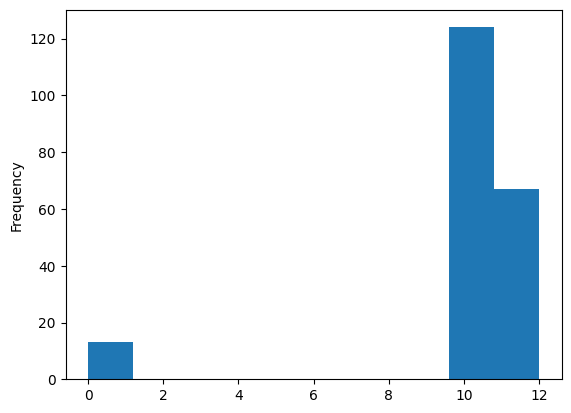

In [59]:
# Distribution of the Draught attribute
df['Draught'].plot.hist()

For a categorical attribute, we plot a bar chart: ```bar()```. For the purpose of the example, we converted the attribute TripID into a categorical attribute. The attributes types will be covered later in the exercise.

<Axes: xlabel='TripID'>

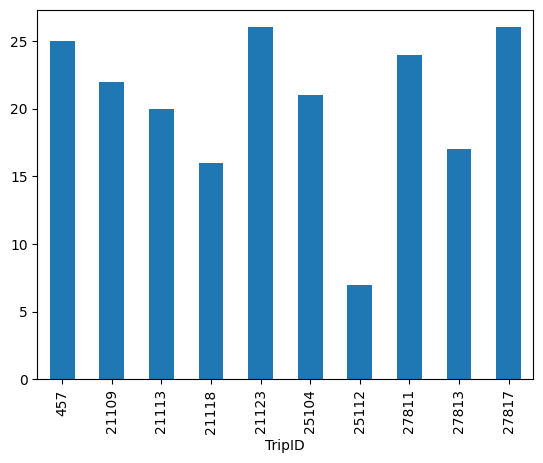

In [60]:
# Convert the TripID attribute
example = df['TripID'].astype('category')
example.value_counts().sort_index().plot.bar()

## 2 Prepare the dataset <a class="anchor" id="t2"></a>

### 2.1 Attribute type (10 min) <a class="anchor" id="t21"></a>

Let's take a look at each attribute in the dataset and their types. In our case, the types can be:
+ ```int64``` and ```float64```: numeric
+ ```category```: categorical
+ ```object```: string
+ ```datetime64[ns]```: time stamp
+ ```timedelta64[ns]```: time difference

In [61]:
# Types of attributes
df.dtypes

TripID              int64
MMSI                int64
StartLatitude     float64
StartLongitude    float64
StartTime          object
EndLatitude       float64
EndLongitude      float64
EndTime            object
ID                  int64
time               object
shiptype            int64
Length              int64
Breadth             int64
Draught           float64
Latitude          float64
Longitude         float64
SOG               float64
COG               float64
TH                  int64
Name               object
Callsign           object
AisSourcen         object
dtype: object

The ```object``` attributes can't be processed by the classic machine learning algorithms that we will be using. We need to convert them into a processable type.

The method ```astype('category')``` changes the type to categorical, while the function ```to_datetime()``` of the ```pandas``` library transforms the attribute to a timestamp.

__Change the type of each of these attributes (2 points).__

In [62]:
# Change attributes type
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])
df['time'] = pd.to_datetime(df['time'])

df['Name'] = df['Name'].astype('category')
df['Callsign'] = df['Callsign'].astype('category')
df['AisSourcen'] = df['AisSourcen'].astype('category')

df.dtypes

TripID                     int64
MMSI                       int64
StartLatitude            float64
StartLongitude           float64
StartTime         datetime64[ns]
EndLatitude              float64
EndLongitude             float64
EndTime           datetime64[ns]
ID                         int64
time              datetime64[ns]
shiptype                   int64
Length                     int64
Breadth                    int64
Draught                  float64
Latitude                 float64
Longitude                float64
SOG                      float64
COG                      float64
TH                         int64
Name                    category
Callsign                category
AisSourcen              category
dtype: object

However, there are 4 other numeric attributes that should be categorical. They can be processed as numeric by a machine learning algorithm, but they represent a variable that is not continuous and it makes more sense to treat them as a category.

__Identify the 4 numeric attributes that should be categorical and change their type (2 points).__

In [63]:
# Change the type of 4 numeric attributes
df['TripID'] = df['TripID'].astype('category')
df['MMSI'] = df['MMSI'].astype('category')
df['ID'] = df['ID'].astype('category')
df['shiptype'] = df['shiptype'].astype('category')

df.dtypes

TripID                  category
MMSI                    category
StartLatitude            float64
StartLongitude           float64
StartTime         datetime64[ns]
EndLatitude              float64
EndLongitude             float64
EndTime           datetime64[ns]
ID                      category
time              datetime64[ns]
shiptype                category
Length                     int64
Breadth                    int64
Draught                  float64
Latitude                 float64
Longitude                float64
SOG                      float64
COG                      float64
TH                         int64
Name                    category
Callsign                category
AisSourcen              category
dtype: object

### 2.2 Create a feature (5 min) <a class="anchor" id="t22"></a>

This dataset contains the information from AIS messages received for 8 trips on the route Rotterdam > Hamburg.

We want to predict the ETT of a trip. It is defined, from each position (each AIS message), as the remaining travel time before arrival. As you can see, the attribute ETT doesn't exist in the dataset: we have to create it. The ETT can be calculated from the existing attributes.

Each instance in the dataset represents one AIS message sent at a certain point of the trip.

__Propose a simple relation to calculate the ETT by combining the existing attributes of the dataset, and create the "ETT" attribute (2 points).__

In [64]:
# Create the ETT attribute
df['ETT'] = df['EndTime'] - df['time']

Verify that the values of the attribute you created are consistent: the duration of the longest trip of the dataset is about 13 hours.

You can use the function ```describe()``` to print the statistics of the attributes.

In [65]:
# Visually verify that it is consistent
df.describe()

,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,time,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,ETT
count,204.000000,204.000000,204,204.000000,204.000000,204,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204
mean,51.957171,4.088092,2016-03-25 19:39:10.882353152,53.530900,9.925591,2016-03-26 18:52:06.176470784,2016-03-26 07:11:49.411764736,258.651961,34.911765,10.204581,53.750773,6.375108,15.633333,75.271078,75.338235,0 days 11:40:16.764705882
min,51.894572,3.945712,2016-01-21 04:32:00,53.506367,9.903362,2016-01-22 06:04:00,2016-01-21 18:20:00,0.000000,0.000000,0.000000,53.733380,6.301220,12.200000,67.000000,64.000000,0 days 09:24:00
25%,51.948239,4.037927,2016-02-12 15:03:00,53.532515,9.908344,2016-02-13 16:38:00,2016-02-13 03:20:45,269.000000,32.000000,10.184120,53.744990,6.337876,13.400000,73.000000,73.000000,0 days 10:58:45
50%,51.955899,4.051555,2016-03-18 10:16:00,53.535772,9.914097,2016-03-19 07:31:00,2016-03-18 19:54:30,269.000000,32.000000,10.642000,53.750980,6.374266,15.100000,75.500000,75.000000,0 days 11:43:00
75%,51.957917,4.079098,2016-04-11 02:16:00,53.539765,9.937500,2016-04-11 21:39:00,2016-04-11 12:13:15,323.000000,43.000000,12.005680,53.756602,6.412344,17.400000,77.000000,77.000000,0 days 12:39:00
max,52.036335,4.443655,2016-07-06 20:58:00,53.539886,9.986082,2016-07-07 21:19:00,2016-07-07 09:43:00,323.000000,48.000000,12.005680,53.769710,6.449503,20.600000,84.500000,85.000000,0 days 13:22:00
std,0.036187,0.138749,NaN,0.012575,0.025237,NaN,NaN,86.688625,11.761675,2.802678,0.007881,0.043965,2.543623,3.250130,3.963915,0 days 01:07:48.402250327


To make it easier for the prediction later on, we want to convert the new attribute ``ETT`` into an numerical attribute, representing the time expressed in minutes. First, let's understand how the value that we created is represented by looking at its type:

In [66]:
df['ETT'].dtype

dtype('<m8[ns]')

If you created the attribute properly, it should be expressed in nanoseconds. We can simply convert it in seconds by using the function ``to_numeric()`` of the ``Pandas`` library and the appropriate calculation on the value. Let's create a new attribute ``ETT_minutes`` to have this change. This new attribute will be the one used for prediction in the rest of the exercise.

In [67]:
df['ETT_minutes'] = pd.to_numeric(df['ETT'])/60000000000

We can verify that the attribute was properly created and that its value is correct.

In [68]:
df.describe()

,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,time,Length,Breadth,Draught,Latitude,Longitude,SOG,COG,TH,ETT,ETT_minutes
count,204.000000,204.000000,204,204.000000,204.000000,204,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204,204.000000
mean,51.957171,4.088092,2016-03-25 19:39:10.882353152,53.530900,9.925591,2016-03-26 18:52:06.176470784,2016-03-26 07:11:49.411764736,258.651961,34.911765,10.204581,53.750773,6.375108,15.633333,75.271078,75.338235,0 days 11:40:16.764705882,700.279412
min,51.894572,3.945712,2016-01-21 04:32:00,53.506367,9.903362,2016-01-22 06:04:00,2016-01-21 18:20:00,0.000000,0.000000,0.000000,53.733380,6.301220,12.200000,67.000000,64.000000,0 days 09:24:00,564.000000
25%,51.948239,4.037927,2016-02-12 15:03:00,53.532515,9.908344,2016-02-13 16:38:00,2016-02-13 03:20:45,269.000000,32.000000,10.184120,53.744990,6.337876,13.400000,73.000000,73.000000,0 days 10:58:45,658.750000
50%,51.955899,4.051555,2016-03-18 10:16:00,53.535772,9.914097,2016-03-19 07:31:00,2016-03-18 19:54:30,269.000000,32.000000,10.642000,53.750980,6.374266,15.100000,75.500000,75.000000,0 days 11:43:00,703.000000
75%,51.957917,4.079098,2016-04-11 02:16:00,53.539765,9.937500,2016-04-11 21:39:00,2016-04-11 12:13:15,323.000000,43.000000,12.005680,53.756602,6.412344,17.400000,77.000000,77.000000,0 days 12:39:00,759.000000
max,52.036335,4.443655,2016-07-06 20:58:00,53.539886,9.986082,2016-07-07 21:19:00,2016-07-07 09:43:00,323.000000,48.000000,12.005680,53.769710,6.449503,20.600000,84.500000,85.000000,0 days 13:22:00,802.000000
std,0.036187,0.138749,NaN,0.012575,0.025237,NaN,NaN,86.688625,11.761675,2.802678,0.007881,0.043965,2.543623,3.250130,3.963915,0 days 01:07:48.402250327,67.806704


### 2.3 Wrong and missing values (15 min) <a class="anchor" id="t23"></a>

With the two ways of visualizing attributes we saw in section 1, we take a close look at each attribute of the dataset. That way, we can discover some distributions which seem weird and are probably noise or mistakes in recording.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   TripID          204 non-null    category       
 1   MMSI            204 non-null    category       
 2   StartLatitude   204 non-null    float64        
 3   StartLongitude  204 non-null    float64        
 4   StartTime       204 non-null    datetime64[ns] 
 5   EndLatitude     204 non-null    float64        
 6   EndLongitude    204 non-null    float64        
 7   EndTime         204 non-null    datetime64[ns] 
 8   ID              204 non-null    category       
 9   time            204 non-null    datetime64[ns] 
 10  shiptype        204 non-null    category       
 11  Length          204 non-null    int64          
 12  Breadth         204 non-null    int64          
 13  Draught         204 non-null    float64        
 14  Latitude        204 non-null    float64   

<Axes: xlabel='AisSourcen'>

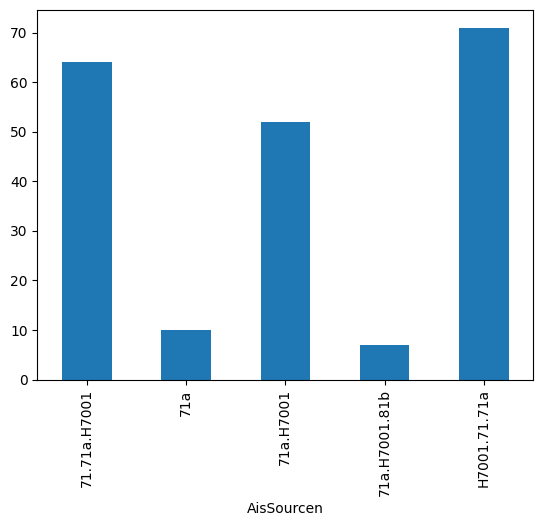

In [70]:
# Visualize the attributes one by one: categorical and time attributes

df['AisSourcen'].value_counts().sort_index().plot.bar()
# change 'TripID' with the other attributes to visualize

<Axes: ylabel='Frequency'>

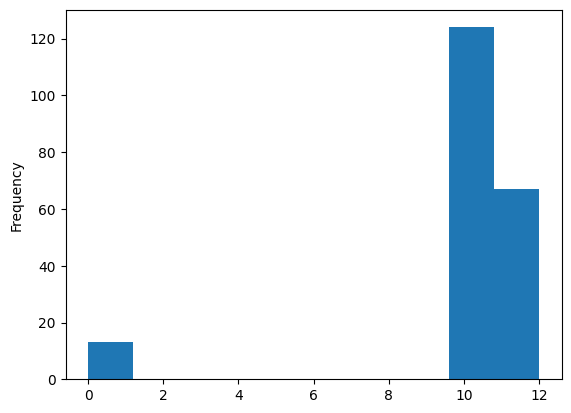

In [71]:
# Visualize the attributes one by one: numeric attributes

df['Draught'].plot.hist()
# change 'StartLatitude' with the other attributes to visualize

We can also visualize the ``ETT`` attribute as we converted it into a numerical value.

<Axes: ylabel='Frequency'>

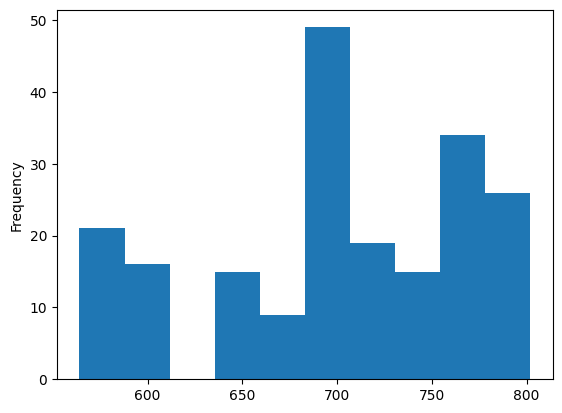

In [72]:
# Plot numeric histogram

df['ETT_minutes'].plot.hist()

From the visualization, we can identify 3 attributes which have a few samples with a wrong value.

To deal with instances with wrong or missing values, there are 3 possibilities:
+ we can recover the real values by guessing or predicting
+ we can set up a neutral value or class, corresponding to the missing value
+ we can delete the instances or the attribute

In our case, it might be possible to recover the values if the same trip contains other instances with a correct value. To verify that, we will first find the Trip ID of the concerned trip.

In [73]:
# Find TripID of the trip with wrong values

df.loc[df['Length'] == 0]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,ID,time,...,Latitude,Longitude,SOG,COG,TH,Name,Callsign,AisSourcen,ETT,ETT_minutes
48,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484459,2016-03-18 19:48:00,...,53.74505,6.356306,17.5,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:43:00,703.0
49,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484879,2016-03-18 19:49:00,...,53.74658,6.364068,17.5,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:42:00,702.0
50,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139486319,2016-03-18 19:50:00,...,53.74814,6.371784,17.4,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:41:00,701.0
51,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139489142,2016-03-18 19:51:00,...,53.74970,6.379482,17.4,71.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:40:00,700.0
52,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139490345,2016-03-18 19:52:00,...,53.75123,6.387216,17.4,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:39:00,699.0
53,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139491349,2016-03-18 19:53:00,...,53.75276,6.394986,17.5,70.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:38:00,698.0
54,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139492876,2016-03-18 19:54:00,...,53.75433,6.402747,17.6,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:37:00,697.0
55,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139495571,2016-03-18 19:56:00,...,53.75729,6.418296,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:35:00,695.0
56,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139494489,2016-03-18 19:55:00,...,53.75583,6.410517,17.5,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:36:00,696.0
57,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139498237,2016-03-18 19:57:00,...,53.75875,6.426075,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:34:00,694.0


We can do the same with the other 2 concerned attributes.

With the attribute ```index```, we get the index of the datapoints concerned for each attribute. Then, we have a list of the datapoints to modify. Also, we can compare if these are the same datapoints for the 3 wrongly recorded attributes.

In [74]:
df.loc[df['Length'] == 0].index

Index([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype='int64')

From there, we can modify the value for these wrong datapoints by taking the right value for the same trip, if it exists. We see that the values which are wrong for the attribute 'Length' all belong to the trip with the TripID = 21113. Let's print the other values recorded for the 'Length' on this trip.

In [75]:
df.loc[df['TripID'] == 21113, 'Length']

41    269
42    269
43    269
44    269
45    269
46    269
47    269
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
Name: Length, dtype: int64

Finally, we can modify the value for the wrong points.

In [76]:
df.loc[df['Length'] == 0, 'Length'] = 269

Now we can do the same with the other 2 attributes.

__Change the wrong values for the 2 other attributes (2 points).__

In [77]:
# Change the wrong values for the 2 other attributes
df.loc[df['Breadth'] == 0]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,ID,time,...,Latitude,Longitude,SOG,COG,TH,Name,Callsign,AisSourcen,ETT,ETT_minutes
48,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484459,2016-03-18 19:48:00,...,53.74505,6.356306,17.5,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:43:00,703.0
49,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484879,2016-03-18 19:49:00,...,53.74658,6.364068,17.5,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:42:00,702.0
50,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139486319,2016-03-18 19:50:00,...,53.74814,6.371784,17.4,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:41:00,701.0
51,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139489142,2016-03-18 19:51:00,...,53.74970,6.379482,17.4,71.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:40:00,700.0
52,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139490345,2016-03-18 19:52:00,...,53.75123,6.387216,17.4,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:39:00,699.0
53,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139491349,2016-03-18 19:53:00,...,53.75276,6.394986,17.5,70.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:38:00,698.0
54,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139492876,2016-03-18 19:54:00,...,53.75433,6.402747,17.6,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:37:00,697.0
55,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139495571,2016-03-18 19:56:00,...,53.75729,6.418296,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:35:00,695.0
56,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139494489,2016-03-18 19:55:00,...,53.75583,6.410517,17.5,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:36:00,696.0
57,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139498237,2016-03-18 19:57:00,...,53.75875,6.426075,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:34:00,694.0


In [78]:
df.loc[df['Breadth'] == 0].index

Index([48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60], dtype='int64')

In [79]:
df.loc[df['TripID'] == 21113, 'Breadth']

41    32
42    32
43    32
44    32
45    32
46    32
47    32
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
Name: Breadth, dtype: int64

In [80]:
df.loc[df['Breadth'] == 0, 'Breadth'] = 32

In [81]:
df.loc[df['Draught'] == 0]

,TripID,MMSI,StartLatitude,StartLongitude,StartTime,EndLatitude,EndLongitude,EndTime,ID,time,...,Latitude,Longitude,SOG,COG,TH,Name,Callsign,AisSourcen,ETT,ETT_minutes
48,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484459,2016-03-18 19:48:00,...,53.74505,6.356306,17.5,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:43:00,703.0
49,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139484879,2016-03-18 19:49:00,...,53.74658,6.364068,17.5,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:42:00,702.0
50,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139486319,2016-03-18 19:50:00,...,53.74814,6.371784,17.4,72.0,69,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:41:00,701.0
51,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139489142,2016-03-18 19:51:00,...,53.74970,6.379482,17.4,71.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:40:00,700.0
52,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139490345,2016-03-18 19:52:00,...,53.75123,6.387216,17.4,72.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:39:00,699.0
53,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139491349,2016-03-18 19:53:00,...,53.75276,6.394986,17.5,70.0,70,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:38:00,698.0
54,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139492876,2016-03-18 19:54:00,...,53.75433,6.402747,17.6,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:37:00,697.0
55,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139495571,2016-03-18 19:56:00,...,53.75729,6.418296,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:35:00,695.0
56,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139494489,2016-03-18 19:55:00,...,53.75583,6.410517,17.5,72.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:36:00,696.0
57,21113,210481000,51.948239,4.080591,2016-03-18 10:16:00,53.5398,9.914805,2016-03-19 07:31:00,139498237,2016-03-18 19:57:00,...,53.75875,6.426075,17.4,73.0,71,CMA.CGM.SAMBHAR,5BND2,71a.H7001,0 days 11:34:00,694.0


In [82]:
df.loc[df['TripID'] == 21113, 'Draught']

41    10.64235
42    10.64235
43    10.64235
44    10.64235
45    10.64235
46    10.64235
47    10.64235
48     0.00000
49     0.00000
50     0.00000
51     0.00000
52     0.00000
53     0.00000
54     0.00000
55     0.00000
56     0.00000
57     0.00000
58     0.00000
59     0.00000
60     0.00000
Name: Draught, dtype: float64

In [83]:
df.loc[df['Draught'] == 0, 'Draught'] = 10.64235

## 3 Build a ML model <a class="anchor" id="t3"></a>

### 3.1 Select the attributes (10 min) <a class="anchor" id="t31"></a>

Before applying the ML algorithm, we need to specify the attributes we want to use for prediction. The list ``x`` will contain the names of the predictive attributes (used for prediction) and the list ``y`` contains the predicted attribute.

Here, we will start with a list ``x`` containing all the attributes, and we will remove one by one the ones we think are not useful for our prediction. Because we want to build a model that would be usable on the go, we remove the 'end' attributes, because in real time we do not know these values. Also, we choose to ignore the time attributes, because they cannot be used with our algorithm in this exercise.

Note: in other tasks, it is usually easier to just add the attributes we want to use. In this exercise, we want to make sure that we consider all the cases that we can encounter.

In [84]:
# Initialize the lists of predictive and predicted attributes

x = ['TripID', 'MMSI', 'StartLatitude', 'StartLongitude', 'ID', 'shiptype', 'Length', 'Breadth',
    'Draught', 'Latitude', 'Longitude', 'SOG', 'COG', 'TH', 'Name', 'Callsign', 'AisSourcen']

y = ['ETT_minutes']

df.dtypes

TripID                   category
MMSI                     category
StartLatitude             float64
StartLongitude            float64
StartTime          datetime64[ns]
EndLatitude               float64
EndLongitude              float64
EndTime            datetime64[ns]
ID                       category
time               datetime64[ns]
shiptype                 category
Length                      int64
Breadth                     int64
Draught                   float64
Latitude                  float64
Longitude                 float64
SOG                       float64
COG                       float64
TH                          int64
Name                     category
Callsign                 category
AisSourcen               category
ETT               timedelta64[ns]
ETT_minutes               float64
dtype: object

In machine learning, useless attributes are usually removed for the prediction, to decrease the complexity of the model and avoid some noise. These are:
+ categorical attributes with high uniquess
+ attributes with low variance
+ categorical attributes with the same distribution (identical)
+ highly correlated attributes

We can check the uniqueness of the attributes with the function ```nunique()```. Note: the function ```nunique()``` returns the number of unique instances. We divide it with the total number of instance to get a percentage of unique instances, easier to process.

In [85]:
# Check uniqueness - only for categorical attributes

df.nunique().apply(lambda x: x/len(df))

TripID            0.049020
MMSI              0.019608
StartLatitude     0.044118
StartLongitude    0.049020
StartTime         0.049020
EndLatitude       0.049020
EndLongitude      0.049020
EndTime           0.049020
ID                1.000000
time              0.980392
shiptype          0.004902
Length            0.019608
Breadth           0.019608
Draught           0.029412
Latitude          0.970588
Longitude         1.000000
SOG               0.215686
COG               0.230392
TH                0.088235
Name              0.019608
Callsign          0.019608
AisSourcen        0.024510
ETT               0.759804
ETT_minutes       0.759804
dtype: float64

We can identify a categorical attribute with a uniqueness of 1: it means that it is changing for each instance. Such an attribute is then useless for prediction, we can remove it.

__Remove the attribute with high uniqueness and set the variable__ ``t31_unique`` __with its name (string) (1 point).__

In [86]:
# Remove the attribute with high uniqueness (replace the ? with the name of the attribute)

x.remove('ID')

t31_unique = 'ID'

Now, we can also search for categorical attributes that have the same value for all AIS messages

In [87]:
# Check whether a categorical attribute has the same value for all messages
df.nunique()

TripID             10
MMSI                4
StartLatitude       9
StartLongitude     10
StartTime          10
EndLatitude        10
EndLongitude       10
EndTime            10
ID                204
time              200
shiptype            1
Length              4
Breadth             4
Draught             6
Latitude          198
Longitude         204
SOG                44
COG                47
TH                 18
Name                4
Callsign            4
AisSourcen          5
ETT               155
ETT_minutes       155
dtype: int64

We can see that there is one attribute which doesn't vary: we can remove it.

__Remove the attribute which doesn't vary and set the variable__ ``t31_allSame`` __with its name (string) (1 point).__

In [88]:
# Remove the attribute with low variance (replace the ? with the name of the attribute)

x.remove('shiptype')

t31_allSame = 'shiptype'

If we take a look again at the distribution of the attributes (from the visualization in the part 1), we can identify a few categorical attributes which have the same distribution (i.e. they are not independent from each other).

In order to verify that 2 attributes are indeed dependent, we can print the cross table.

In [89]:
# Check distribution of categorical attributes

pd.crosstab(df['MMSI'], df['Name'])

pd.crosstab(df['MMSI'], df['Callsign'])

Callsign,3EZI9,5BND2,9HA3457,VRCU7
MMSI,,,,
210481000,0,84,0,0
229620000,0,0,28,0
373202000,25,0,0,0
477829700,0,0,0,67


For instance, we can see that the attributes 'MMSI' and 'Name' have the exact same distribution (i.e. an instance with a value x1 for 'MMSI' will always have the value x2 for 'Name'): more than independent, they are identical and we can remove one to decrease the complexity of the model.

Note: two attributes can have the same distribution in the train dataset by chance, and have a different distribution in the rest of the data. When it is possible, we should always ensure that the action we do on the dataset makes sense. For instance here, it is not surprising that the attributes 'MMSI' and 'Name' are identical, as they both represent the ship used for the trip. It is important to always keep in mind the meaning of the variables we are handling, when possible.

There is another attribute which have the same distribution as 'Name' and 'MMSI'.

__Find this attribute by printing the crosstab, and remove 2 out of these 3 attributes (here, keep the 'Name' because we will be using it in the next part).__
__Set the variables__ ``t31_dis1`` __and__ ``t31_dis2`` __with the names of the 2 removed attributes (strings) (2 points).__

In [90]:
# Remove the 2 attributes with the same distribution as MMSI

x.remove('MMSI')
x.remove('Callsign')

t31_dis1 = 'MMSI'
t31_dis2 = 'Callsign'

### 3.2 Split train-test (10 min) <a class="anchor" id="t32"></a>

To estimate the performance of a model, the ML model is applied on a new dataset which has not been used to build it, and the number of correctly classified instances is measured. As we usually get all the data in one dataset, we need to split this dataset into a training set and a testing set, so we can build the model on the training set and keep the testing set for measuring the performance.

Several methods can be used as a test option:
* __Separated training and testing sets__: from the available data, two datasets are created containing different instances. It can be used if the data have to be separated in a controlled way (for example: the AIS data have to be separated so that the training and testing sets contain AIS messages from different trips)
* __Percentage split__: the dataset can simply be randomly splitted and the model will be built on only one part of the available data. The value of the percentage is to be set up personally depending on the size of the dataset, it is common to use 80 - 20, or also 2/3 - 1/3.
* __Cross-validation__: the dataset is splitted into 10 subsets. The model is built on 9 subsets and tested on the 10th one. The operation is repeated until each dataset has been used for testing, and the final performance is the average on the 10 performances measured. This method of validation is often used on small datasets, when the data is precious.

As mentionned in the example, in our case we need to split the data according to the 'TripID' attribute, so that there is no datapoints in the training and the testing set that belong to the same trip.

First, we get a list of the different trips that we have with the method ```unique()```.

In [91]:
ids = df['TripID'].unique()
print(ids)

[27811, 27813, 21113, 27817, 25104, 21118, 25112, 21123, 21109, 457]
Categories (10, int64): [457, 21109, 21113, 21118, ..., 25112, 27811, 27813, 27817]


From this list, we will randomly select 80% of the trips (8 trips out of 10).

In any ML program, we might need to use a random function. For example, here, we create a mask which randomly selects a percentage of the data. Sometimes, a ML algorithm can start with random parameters. For this reason, we can set up a random seed: that way, the results of the random function will be reproducible for later cases. Here, we use the function ``seed`` from the ``numpy`` library. In this exercise, we set up the value of the seed to 1, if we change this value, the randomization will be different.

In [92]:
# Set up the random seed

import numpy as np

np.random.seed(1)

In [93]:
# Randomly select 8 ids in the list

id_train = np.random.choice(ids, 8, False) # the parameter False allows for no duplicate in the selected ids

Finally, we can process the dataset. We create 2 new datasets ``train`` and ``test`` containing each the instances of the right TripID. For this we use the function ``isin()`` to get the values that belong to a list.

Optionally, we can make a copy of the instances with the function ``copy()``, so the initial dataset is not changed by further modifications that we could make on ``train`` and ``test``.

In [94]:
# Create train and test sets

train = df.loc[df['TripID'].isin(id_train)].copy()
test = df.loc[~df['TripID'].isin(id_train)].copy()

We can always verify that the datasets we created make sense with the basic methods to analyse a dataset (from Part 1).

### 3.3 Dummies (10 min) <a class="anchor" id="t33"></a>

Some algorithms can only process numerical attributes. This is the case of the KNN algorithm that we want to use in this exercise.

Therefore, we need to transform the categorical attributes into numeric ones. For that, we will create one new attribute for each different class of the categorical attribute. Then, we can code the value of each class by adding the value 1 if the class is the corresponding one, or 0 if it is not. This method is called __one-hot encoding__ and the attributes created are called __dummy variables__ (dummies).

Here is an example of the method applied on the attribute 'Name':

![text](01-dummies.PNG)

The function ``get_dummies()`` from the ``Pandas`` library creates the dummies for a dataset passed in argument. Here is an example with the attribute 'Name'.

In [95]:
# Get the dummies

dummies = pd.get_dummies(train['Name'], drop_first = False)
print(dummies)

     CMA.CGM.SAMBHAR  IMARI  MSC.AZOV  OOCL.SOUTHAMPTON
0              False  False     False              True
1              False  False     False              True
2              False  False     False              True
3              False  False     False              True
4              False  False     False              True
..               ...    ...       ...               ...
199            False   True     False             False
200            False   True     False             False
201            False   True     False             False
202            False   True     False             False
203            False   True     False             False

[166 rows x 4 columns]


In our case, we want to add a prefix to the name of the dummy variables, to identify the attribute that have been replaced.

In [96]:
# Add the name of the attribute

dummies = dummies.add_prefix("Name#")
print(dummies)

     Name#CMA.CGM.SAMBHAR  Name#IMARI  Name#MSC.AZOV  Name#OOCL.SOUTHAMPTON
0                   False       False          False                   True
1                   False       False          False                   True
2                   False       False          False                   True
3                   False       False          False                   True
4                   False       False          False                   True
..                    ...         ...            ...                    ...
199                 False        True          False                  False
200                 False        True          False                  False
201                 False        True          False                  False
202                 False        True          False                  False
203                 False        True          False                  False

[166 rows x 4 columns]


Now that we have created the dummies for the attribute 'Name', we can replace it in the dataset. First, we drop the original column for the attribute 'Name', and then we join the created dummies.

In [97]:
# Replace the attribute in the dataset

# Drop the old attribute
train.drop('Name', axis = 1, inplace = True)

# Add the dummies
train = train.join(dummies)

We can then check if the change was successful with the function ``info()``.

In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 203
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   TripID                 166 non-null    category       
 1   MMSI                   166 non-null    category       
 2   StartLatitude          166 non-null    float64        
 3   StartLongitude         166 non-null    float64        
 4   StartTime              166 non-null    datetime64[ns] 
 5   EndLatitude            166 non-null    float64        
 6   EndLongitude           166 non-null    float64        
 7   EndTime                166 non-null    datetime64[ns] 
 8   ID                     166 non-null    category       
 9   time                   166 non-null    datetime64[ns] 
 10  shiptype               166 non-null    category       
 11  Length                 166 non-null    int64          
 12  Breadth                166 non-null    int64          


One last step: if the attribute we changed was in the list ``x``, we should change its name in the list.

In [99]:
# Change the list x

# Remove the old attribute
x.remove('Name')

# Add the new attributes
x = [*x, *dummies.columns.values]

We can verify that the change has been successful.

In [100]:
x

['TripID',
 'StartLatitude',
 'StartLongitude',
 'Length',
 'Breadth',
 'Draught',
 'Latitude',
 'Longitude',
 'SOG',
 'COG',
 'TH',
 'AisSourcen',
 'Name#CMA.CGM.SAMBHAR',
 'Name#IMARI',
 'Name#MSC.AZOV',
 'Name#OOCL.SOUTHAMPTON']

We can create a function to automatize these steps. Our function ``dummies()`` take as an argument the dataset, the list of predictive attributes ``x`` and the name of the attribute we want to modify, and returns the new dataset and the new list of predictive attributes.

In [101]:
# Create function dummies()

def dummies(df, x, att_name):
    df_enc = df.copy()
    new_x = x.copy()
    
    dummies = pd.get_dummies(df[att_name], drop_first = False)
    dummies = dummies.add_prefix("{}#".format(att_name))
    df_enc.drop(att_name, axis = 1, inplace = True)
    df_enc = df_enc.join(dummies)
    
    if att_name in new_x:
        new_x.remove(att_name)
        new_x = [*new_x, *dummies.columns.values]
    
    return df_enc, new_x

Let's try our new function on the ``test`` dataset with the attribute 'Name'.

In [102]:
test, x = dummies(test, x, 'Name')

In [103]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 108 to 178
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   TripID                 38 non-null     category       
 1   MMSI                   38 non-null     category       
 2   StartLatitude          38 non-null     float64        
 3   StartLongitude         38 non-null     float64        
 4   StartTime              38 non-null     datetime64[ns] 
 5   EndLatitude            38 non-null     float64        
 6   EndLongitude           38 non-null     float64        
 7   EndTime                38 non-null     datetime64[ns] 
 8   ID                     38 non-null     category       
 9   time                   38 non-null     datetime64[ns] 
 10  shiptype               38 non-null     category       
 11  Length                 38 non-null     int64          
 12  Breadth                38 non-null     int64          

__Now, apply the function on the other categorical attributes for both ``train`` and ``test`` datasets.__

Note: Do not do the change for the ID attribute, because it contains too many values, and we already decided to ignore it for prediction. In general, we don't have to do the change for the attributes that we ignore in the prediction.

Use the function ``dtypes`` to verify that you don't forget any categorical attribute.

In [104]:
# Get dummies for train and test

train, x = dummies(train, x, 'TripID')
test, x = dummies(test, x, 'TripID')
# do the same for other attributes

train, x = dummies(train, x, 'MMSI')
test, x = dummies(test, x, 'MMSI')
train, x = dummies(train, x, 'Callsign')
test, x = dummies(test, x, 'Callsign')
train, x = dummies(train, x, 'AisSourcen')
test, x = dummies(test, x, 'AisSourcen')

In [105]:
# Last check

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, 0 to 203
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype          
---  ------                    --------------  -----          
 0   StartLatitude             166 non-null    float64        
 1   StartLongitude            166 non-null    float64        
 2   StartTime                 166 non-null    datetime64[ns] 
 3   EndLatitude               166 non-null    float64        
 4   EndLongitude              166 non-null    float64        
 5   EndTime                   166 non-null    datetime64[ns] 
 6   ID                        166 non-null    category       
 7   time                      166 non-null    datetime64[ns] 
 8   shiptype                  166 non-null    category       
 9   Length                    166 non-null    int64          
 10  Breadth                   166 non-null    int64          
 11  Draught                   166 non-null    float64        
 12  Latitude     

In [ ]:
test.info()

In [106]:
x

['StartLatitude',
 'StartLongitude',
 'Length',
 'Breadth',
 'Draught',
 'Latitude',
 'Longitude',
 'SOG',
 'COG',
 'TH',
 'Name#CMA.CGM.SAMBHAR',
 'Name#IMARI',
 'Name#MSC.AZOV',
 'Name#OOCL.SOUTHAMPTON',
 'TripID#457',
 'TripID#21109',
 'TripID#21113',
 'TripID#21118',
 'TripID#21123',
 'TripID#25104',
 'TripID#25112',
 'TripID#27811',
 'TripID#27813',
 'TripID#27817',
 'AisSourcen#71.71a.H7001',
 'AisSourcen#71a',
 'AisSourcen#71a.H7001',
 'AisSourcen#71a.H7001.81b',
 'AisSourcen#H7001.71.71a']

### 3.4 Apply the algorithm (5 min) <a class="anchor" id="t34"></a>

To apply a ML algorithm, we first need to build the model. Here, we will use the algorithm ``KNeighborsRegressor`` which is an algorithm from the library ``sklearn``. It is a KNN algorithm for a regression problem. In our case, we want to predict the ETT, a numerical feature.

The ``KNeighborsRegressor`` takes as an parameter the number of neighbors. In this exercise, we do not focus on tuning the model, so we will take a value of 25.

In [107]:
# Import and build the model

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 25)

Once the model is built, we want to train it on our training dataset. For that, we use the function ``fit()`` from the model itself.

Most algorithms have usually a function ``fit()`` or a similar one. Always check the official documentation if you are unsure on how to use the model (for example, here is the documentation for the ``KNeighborsRegressor``: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html ).

Here, the function ``fit()`` takes as argument the training data without the label (``x``) and the label (``y``).

In [108]:
# Train the model

knn.fit(train[x], train[y])

,n_neighbors,25
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Once the model is trained, we can generate the predictions on our test set. For that, we use here the function ``predict()`` of the model. This function takes as an argument the test set without the labels, and returns a series of predictions.

In [109]:
# Get the predictions

predictions = knn.predict(test[x])

## 4 Measure the performance (5 min) <a class="anchor" id="t4"></a>

We can examine the variable ``predictions``, and see that it looks the same as the series or real labels that we have in the variable ``test[y]``.

In [110]:
predictions

array([[703.  ],
       [702.72],
       [702.48],
       [702.48],
       [702.48],
       [702.88],
       [702.52],
       [702.52],
       [702.52],
       [702.28],
       [703.24],
       [702.96],
       [703.  ],
       [703.  ],
       [703.  ],
       [703.  ],
       [705.16],
       [704.  ],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.88],
       [703.84],
       [703.84],
       [703.  ],
       [703.  ]])

In [111]:
test[y]

,ETT_minutes
108,596.0
109,608.0
110,607.0
111,606.0
112,605.0
113,604.0
114,602.0
115,602.0
116,601.0
117,599.0


There are many ways to measure the performance of a model. In the case of a regression problem, we can simply compute the mean absolute error with the function ``mean_absolute_error()`` from the library ``sklearn``.

The mean absolute error (MAE) represents the average difference between the prediction and the real value. It is given in the unit of the predicted attribute. The RAE (relative absolute error) is the same but expressed in percent on the dataset (divided by the variation of the predicted attribute).

We can choose one metric or another to express the performance, each metrics will give us a different understanding on the error.

In [112]:
# Import and compute the mean absolute error

from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions, test[y])

49.15789473684212

This error gives us the average error in minutes of our model, for the prediction of the 'ETT'.

## 5 Summary questions <a class="anchor" id="t5"></a>

*Which type of attribute cannot be processed raw by the KNN algorithm?*

:- Categorical attributes

*Which numeric attributes should be transformed to better represent the reality?*

:- Not continuous numeric attributes

*What can we say about the points which have a wrong value for the 3 attributes mentioned? Should we discard these points, or recover the values? Why?*

:- Since Length, Breadth and Draught cannot be 0, they are wrong values. These points cannot be discarded as we have other values from same trip id which are nearly same and equals to reality, so they can be recovered by comparing and copying based on the id.

*Which attributes are useless for the prediction, and why?*

:- 1. Categorical attributes with less more uniqueness
		2. Categorical attributes with similar distribution
		3. Attributes with low variance
		4. Attributes which are highly correlated
		(Reason: To decrease the complexity of the model and to avoid some noise)

*Which other attribute is not detected by the usual numeric methods, but in our case does not provide any additional information for the prediction?*

:- TripID

*How can we simplify the model without any loss of information from the attributes with the same distribution?*

:- If they have a same information and more than independent they are identical towards each other we can just drop one of it to reduce the complexity of the model without any loss of information